Decision Trees
===============
Suppose a cat/dog classification problem, where the data consists of three features and a target.
The features are categorical, and the target is binary.
After the decision tree is trained on the data, it can be visualized as a tree.
The tree consists of nodes and edges.
It works by asking a question at each node, and based on the answer, it goes to the next node.
The top-most node is called the root node.
The nodes at the bottom are called leaf nodes.
The leaf nodes contain the predictions.
The nodes in the middle are called decision nodes.
The decision nodes contain the decision rules.

Decision Tree Learning Process
===============================
The decision tree learning process is a greedy algorithm.
It starts with a root node.
It selects the best feature to split the data.
It splits the data based on the selected feature.
It creates a decision node.
It repeats the process for each child node.
It stops when the stopping criteria are met.
The stopping criteria can be the maximum depth, minimum samples per leaf, etc.

Key decisions:
- How to select the best feature to split the data at each node? ---> maximize purity
- When do you stop splitting? ----> a) when the node is 100% pure, b) when the node reaches the maximum depth, c) when improvements in purity score are below a threshold, d) when the number of examples in a node is below a threshold

Measuring Purity
=================
Entropy as a measure of impurity
---------------------------------
Entropy is a measure of impurity.
It is calculated as the sum of the negative of the probability of each class times the log of the probability of each class.
Entropy is 0 when the node is pure.
Entropy is 1 when the node is equally distributed.
Entropy is between 0 and 1.
Entropy is calculated as:
$$Entropy = -\sum p(x) \log p(x)$$
where p(x) is the probability of each class.

So suppose we have a node with 10 examples, 6 of class 0 and 4 of class 1.
The entropy of the node is:
$$Entropy = -\left(\frac{6}{10} \log \frac{6}{10} + \frac{4}{10} \log \frac{4}{10}\right)$$
$$Entropy = -\left(0.6 \log 0.6 + 0.4 \log 0.4\right)$$
$$Entropy = -\left(0.6 \times -0.2218 + 0.4 \times -0.322 \right)$$
$$Entropy = -\left(-0.1331 - 0.1288\right)$$
$$Entropy = 0.2619$$

Note: notice the similarity between the formula and the formula for the cross-entropy loss.

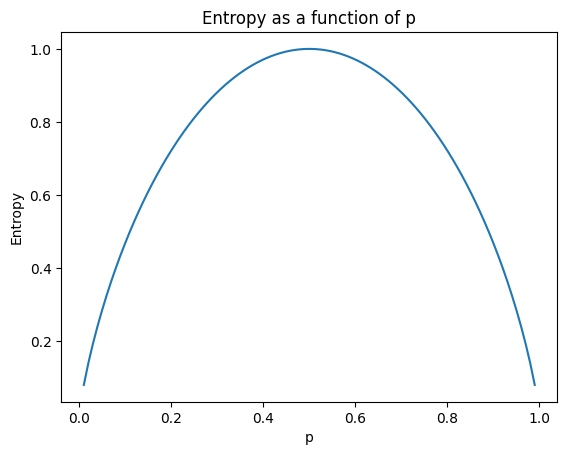

In [1]:
# plot the entropy function
import numpy as np
import matplotlib.pyplot as plt


def entropy(p):
    return -p * np.log2(p) - (1 - p) * np.log2(1 - p)


p = np.linspace(0.01, 0.99, 100)
plt.plot(p, entropy(p))
plt.xlabel('p')
plt.ylabel('Entropy')
plt.title('Entropy as a function of p')
plt.show()

Information Gain
================
When choosing a feature to split the data, we want to maximize the information gain.
Information gain is the reduction in entropy.

Suppose we calculate the entropy for the right and left subbranches after splitting the data for each feature.
Instead of just comparing them, we calculate the weighted average of the entropy of the right and left subbranches.
Then we calculate the entropy of the parent node.
The information gain is the entropy of the parent node minus the weighted average of the entropy of the right and left subbranches.
Thus, we calculate the 'reduction' in entropy.
We choose the feature that maximizes the information gain.

Information gain is calculated as:
$$IG = Entropy(parent) - \sum \frac{N(v)}{N} Entropy(v)$$
where N(v) is the number of examples in the node v, N is the number of examples in the parent node, and Entropy(v) is the entropy of the node v.

Why do we bother to compute the reduction instead of just the entropy of the right and left subbranches?
Because the stopping criteria is, if the reduction in entropy is too small, in which case by splitting further, you're just making the tree unnecessarily deep and risking overfitting.

Decision Tree Learning
=======================
- Start with the root node
- Select the best feature (with the highest information gain) to split the data
- Split the data into two based on the selected feature
- Keep repeating the splitting process until stopping criteria is met:
- stopping criteria can be the maximum depth, minimum samples per leaf, etc.

Note: The decision tree learning process is actually a recursive process.

One-Hot Encoding for Categorical Features
==========================================
In cases where the features are categorical, we need to convert them to numerical.
One way to do this is to use one-hot encoding.
One-hot encoding converts each category into a binary vector.
For example, suppose we have a feature with three categories: red, green, blue.
One-hot encoding converts the feature into three binary features: is_red, is_green, is_blue.
If the category is red, then is_red is 1 and is_green and is_blue are 0.

Continuous Valued Features
==========================
Continuous valued features are the ones that can take on a range of values.
When selecting the best feature to split the data, we need to consider the continuous valued features.
One way to do this is to sort the values of the continuous feature.
Then we calculate the midpoints between the values.
We calculate the information gain for each midpoint.
We choose the midpoint that maximizes the information gain.

For example, suppose we have a continuous feature with values [1, 2, 3, 4, 5].
The midpoints are [1.5, 2.5, 3.5, 4.5].
We calculate the information gain for each midpoint.
We choose the midpoint that maximizes the information gain.
The rest of the algorithm is the same as for categorical features.

Note: You pick the midpoint as the split point, only when the information gain is higher than all other features and midpoints.
Note: It is possible to have the same feature for the left and right subbranches.

Regression Trees
=================
We can generalize decision trees to regression problems.
In regression problems, the target is continuous.
If a new test example is given, the prediction is the average of the target values in the leaf node.
The splitting criteria can be the variance of the target values in the leaf node.
So when choosing a split, just as in a classification problem, we choose the split that maximizes the reduction in variance.
The variance is calculated as:  
$$Var = \frac{1}{N} \sum (y - \bar{y})^2$$
where y is the target value, and $\bar{y}$ is the mean of the target values.
The information gain is calculated as:
$$IG = Var(parent) - \sum \frac{N(v)}{N} Var(v)$$
where N(v) is the number of examples in the node v, N is the number of examples in the parent node, and Var(v) is the variance of the target values in the node v.

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

Generate Data

In [12]:
X, y = make_classification(
    n_samples=500,
    n_features=3,
    n_informative=3,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=42
)

In [13]:
df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(X.shape[1])])
df['target'] = y

print(df.head())

   feature_0  feature_1  feature_2  target
0  -2.423153  -2.510600   1.227190       0
1  -2.313011  -2.241043   1.336992       0
2   0.158133  -0.821084   0.069002       0
3   1.600811  -1.383851  -0.478594       1
4  -0.792493  -1.280908   0.654579       0


In [14]:
# make the features categorical
# Convert continuous features to categorical using quantile-based binning
df['feature_0_cat'] = pd.qcut(df['feature_0'], q=3, labels=False)
df['feature_1_cat'] = pd.qcut(df['feature_1'], q=2, labels=False)
df['feature_2_cat'] = pd.qcut(df['feature_2'], q=2, labels=False)

# drop the original continuous features
df.drop(['feature_0', 'feature_1', 'feature_2'], axis=1, inplace=True)

print(df.head())

   target  feature_0_cat  feature_1_cat  feature_2_cat
0       0              0              0              1
1       0              0              0              1
2       0              1              1              0
3       1              2              0              0
4       0              0              0              0


In [15]:
# make the feature_0_cat one-hot encoded
df = pd.get_dummies(df, columns=['feature_0_cat'])
# convert true=1, false=0
df['feature_0_cat_0'] = df['feature_0_cat_0'].astype(int)
df['feature_0_cat_1'] = df['feature_0_cat_1'].astype(int)
df['feature_0_cat_2'] = df['feature_0_cat_2'].astype(int)
print(df.head())

   target  feature_1_cat  feature_2_cat  feature_0_cat_0  feature_0_cat_1  \
0       0              0              1                1                0   
1       0              0              1                1                0   
2       0              1              0                0                1   
3       1              0              0                0                0   
4       0              0              0                1                0   

   feature_0_cat_2  
0                0  
1                0  
2                0  
3                1  
4                0  


In [16]:
# split the data
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

The model

In [17]:
def entropy(p):
    """Calculate entropy given a probability p."""
    return -p * np.log2(p) - (1 - p) * np.log2(1 - p) if p not in [0, 1] else 0

In [18]:
def calculate_entropy(y):
    """Calculate the entropy of a binary target variable y."""
    if len(y) == 0:
        return 0
    p1 = (y == 1).sum() / len(y)
    return entropy(p1)

In [19]:
def split_data(X, y, feature):
    """Split the data based on the feature and return both X and y splits."""
    left_mask = X[feature] == 0
    right_mask = X[feature] == 1
    return X[left_mask], X[right_mask], y[left_mask], y[right_mask]

In [20]:
def weighted_entropy(left_y, right_y):
    """Calculate weighted entropy of the left and right splits."""
    n = len(left_y) + len(right_y)
    p_left = len(left_y) / n
    p_right = len(right_y) / n
    entropy_left = calculate_entropy(left_y)
    entropy_right = calculate_entropy(right_y)
    return p_left * entropy_left + p_right * entropy_right

In [21]:
def information_gain(parent_y, left_y, right_y):
    """Calculate information gain from a parent and its children splits."""
    entropy_parent = calculate_entropy(parent_y)
    entropy_children = weighted_entropy(left_y, right_y)
    return entropy_parent - entropy_children

In [22]:
def find_best_split(X, y):
    """Find the best feature to split on based on information gain."""
    best_feature = None
    best_ig = 0
    best_left_X = None
    best_right_X = None
    best_left_y = None
    best_right_y = None

    for feature in X.columns:
        left_X, right_X, left_y, right_y = split_data(X, y, feature)
        ig = information_gain(y, left_y, right_y)
        if ig > best_ig:
            best_ig = ig
            best_feature = feature
            best_left_X = left_X
            best_right_X = right_X
            best_left_y = left_y
            best_right_y = right_y

    return best_feature, best_ig, best_left_X, best_right_X, best_left_y, best_right_y


In [33]:
def decision_tree(X, y, depth=0, max_depth=4):
    """Recursively build a decision tree based on information gain."""
    if depth == max_depth or len(set(y)) == 1:
        return y.mean()

    feature, ig, left_X, right_X, left_y, right_y = find_best_split(X, y)
    
    if ig == 0:
        return y.mean()

    tree = {feature: [
        decision_tree(left_X, left_y, depth + 1, max_depth),
        decision_tree(right_X, right_y, depth + 1, max_depth)
    ]}

    return tree

In [34]:
tree = decision_tree(X_train, y_train)

In [35]:
# visualize the tree
import json

print(json.dumps(tree, indent=4))

{
    "feature_0_cat_2": [
        {
            "feature_0_cat_0": [
                {
                    "feature_1_cat": [
                        {
                            "feature_2_cat": [
                                0.6829268292682927,
                                1.0
                            ]
                        },
                        {
                            "feature_2_cat": [
                                0.043478260869565216,
                                0.6923076923076923
                            ]
                        }
                    ]
                },
                {
                    "feature_2_cat": [
                        {
                            "feature_1_cat": [
                                0.13043478260869565,
                                0.0
                            ]
                        },
                        {
                            "feature_1_cat": [
                               

In [36]:
def predict(tree, X):
    """
    Predict the target value for a single instance X using the decision tree.
    """
    if not isinstance(tree, dict):
        return tree
    
    # Get the feature to split on
    feature = next(iter(tree))
    subtree = tree[feature]
    
    # Traverse the tree recursively
    feature_value = X[feature]
    branch = subtree[int(feature_value)]  # Convert feature value to int (0 or 1)
    
    return predict(branch, X)

In [27]:
def predict_all(tree, X):
    """
    Predict the target values for a DataFrame X using the decision tree.
    """
    return X.apply(lambda x: predict(tree, x), axis=1)

In [37]:
# Make predictions on the test set
y_pred = predict_all(tree, X_test)

# Convert predictions to binary class (if using classification)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert mean to class 0 or 1 based on threshold

# Calculate accuracy
accuracy = (y_pred_binary == y_test).mean()
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9100


In [39]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# Instantiate the classifier
clf = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

# Fit the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = (y_pred == y_test).mean()
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9100


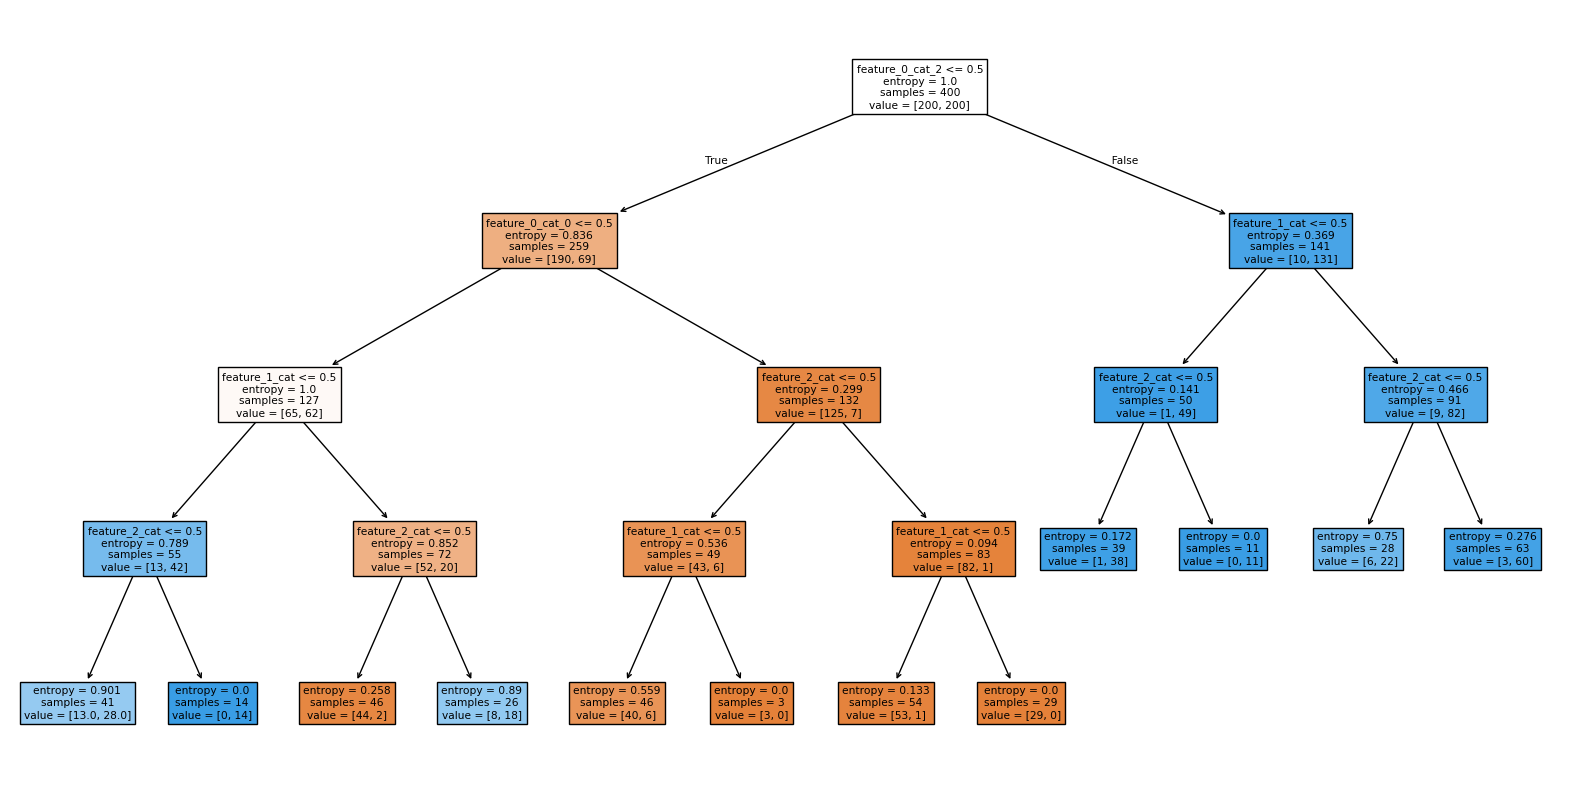

In [40]:
# visualize the tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, filled=True)
plt.show()